# Final Project - Machine Learning for Stock Market Analysis & Forecasting: AAPL, GOOG, MSFT, AMZN Case Study

## Reasons for Choosing AAPL, GOOG, MSFT, AMZN:
Market Leadership: These four tech companies are industry leaders, making their stocks a good indicator of the tech sector's and broader market's state.

Liquidity: Their large market cap makes these stocks highly traded and efficient.

Correlation: The prices of these stocks often move in a correlated manner which can be important for portfolio construction and risk management strategies.

Investment in AI: These companies are heavily investing in AI, which could drive their future growth and makes them attractive for investment.

## Stage 1: Define the problems

#### The three key problems that we define in this project are:

#### 1. Risk and Return Analysis Problem:

Which stock (AAPL, GOOG, MSFT, or AMZN) has the most favorable risk-return profile?

This task requires using statistical tools to calculate and compare these stocks in order to identify the one with the best balance of risk and expected return for our prediction model.


#### 2. Stock Price Prediction Problem:

Once the best stock is chosen through risk and return analysis, how to train a machine   learning model effectively using the historical price data to predict future stock prices?

Our objective is to build, optimize, and assess machine learning models to learn from the past price fluctuations of a stock and predict future prices.
The goal of this problem is to explore the capacity of machine learning model, which is chosen due to its proficiency in handling sequential data, which is inherent in time-series data like stock prices.
By combining the training and testing stages, we will evaluate each model's performance using evaluation metrics to measure its error on a separate test dataset.

#### 3. Forecast Uncertainty Estimation Problem:

What is the optimal specific period for real-time stock price prediction?

We need to determine an optimal period for real-time stock price predictions that balances accuracy and utility. The performance of the model on the test data across different prediction timeframes will guide the choice of an optimal prediction period.

How can we effectively deploy the trained models to perform real-time predictions ?

We need to configure each model to provide a rolling forecast, updating the predictions as each new data point comes in. Furthermore, given the inherent unpredictability of stock markets, it's crucial to provide a measure of confidence or uncertainty with each prediction, then devise a method for quantifying this uncertainty.

##### As stock markets are influenced by numerous external factors, predictions made by any model will inherently contain some uncertainty.        The objective here is not to build a "perfect" prediction model, but rather to explore the capabilities of machine learning in the context of stock price prediction, and forecast uncertainty estimation.



## Stage2: Build the Dataset

### 2.1 Data Collection

In [1]:
!pip install -q yfinance
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)   # Collecting the past year of data for risk and return analysis
# (In the fast changing tech sector, by focusing on the most recent year of data,
#  it can capture the most current snapshot for risk and return analysis)

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']   # Tickers of the tech companies

df = pd.DataFrame()   

for stock in tech_list:
    company = yf.download(stock, start, end)
    company['Ticker'] = stock   # Assign the ticker to the data
    df = pd.concat([df, company])  


AAPL = df[df['Ticker'] == 'AAPL']
GOOG = df[df['Ticker'] == 'GOOG']
MSFT = df[df['Ticker'] == 'MSFT']
AMZN = df[df['Ticker'] == 'AMZN']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 2.2 Data Inspection

In [2]:
from IPython.display import display

# Checking the first and last few records to understand the structure and verify the data was downloaded up to the latest date.
print("First and last few records:")
display(df)

# Checking the size of the data to confirm the number of records and fields
print("\nSize of the dataset:")
display(df.shape)

# Checking the data types of each field to understand what types of variables working with
print("\nData types of each field:")
display(df.dtypes)

# Checking for missing values to ensure data integrity
print("\nNumber of missing values in each field:")
display(df.isnull().sum())

# Checking the unique stock tickers to confirm the data for all intended stocks
print("\nUnique stock tickers in the data:")
display(df['Ticker'].nunique())
display(df['Ticker'].unique())

First and last few records:


,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071671,74064300,AAPL
2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481308,66253700,AAPL
2022-07-08,145.259995,147.550003,145.000000,147.039993,146.167191,64547800,AAPL
2022-07-11,145.669998,146.639999,143.779999,144.869995,144.010071,63141600,AAPL
2022-07-12,145.759995,148.449997,145.050003,145.860001,144.994186,77588800,AAPL
...,...,...,...,...,...,...,...
2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500,AMZN
2023-06-29,128.770004,129.259995,127.260002,127.900002,127.900002,40761000,AMZN
2023-06-30,129.470001,131.250000,128.949997,130.360001,130.360001,54310500,AMZN



Size of the dataset:


(1004, 7)


Data types of each field:


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Ticker        object
dtype: object


Number of missing values in each field:


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64


Unique stock tickers in the data:


4

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

The dataset consists of one year of daily trading data for four major tech companies (AAPL, GOOG, MSFT, AMZN), including open, high, low, close, adjusted close prices, and trading volume. The data seems to be complete without any missing values, and all the numerical fields show reasonable ranges. These preliminary checks suggest that the data is in good shape for further analysis.

### 2.3 summary statistics
#### Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution

In [3]:
for stock in tech_list:
    print(f"\nSummary Statistics for {stock}:")
    display(df[df['Ticker'] == stock].describe())  # Extracting summary statistics for each stock
    
print("\nDescriptive statistics for the data price:")
display(df.describe()) # Computing descriptive statistics for the data price to get a sense of its distribution


Summary Statistics for AAPL:


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,155.506754,157.371873,153.948279,155.788087,155.366362,7.184562e+07
std,14.913134,14.707645,15.235897,15.016167,15.129048,2.273311e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,2.230602e+07
25%,145.084999,147.029999,143.165001,145.449997,145.000946,5.547655e+07
50%,152.740005,154.580002,150.910004,153.039993,152.658844,6.844560e+07
75%,165.904999,167.300003,164.459999,165.970001,165.481110,8.161725e+07
max,193.779999,194.479996,191.759995,193.970001,193.970001,1.647624e+08



Summary Statistics for GOOG:


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,104.752209,106.278976,103.557901,104.950873,104.950873,2.730892e+07
std,11.113910,11.231325,11.141310,11.239711,11.239711,1.098989e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.759998,97.349998,94.470001,95.840000,95.840000,2.074860e+07
50%,102.879997,104.220001,101.860001,103.629997,103.629997,2.468080e+07
75%,114.076000,115.823502,112.080254,114.699997,114.699997,3.078070e+07
max,127.574997,129.550003,125.970001,127.910004,127.910004,9.779860e+07



Summary Statistics for MSFT:


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,268.301155,271.429203,265.457719,268.602350,267.390792,2.856596e+07
std,32.109036,32.112275,32.307188,32.324782,32.743358,1.031898e+07
min,217.550003,220.410004,213.429993,214.250000,212.649261,8.612560e+06
25%,243.160004,245.305000,240.264999,242.514999,241.041595,2.222275e+07
50%,259.750000,262.589996,255.860001,258.519989,257.045349,2.639470e+07
75%,285.919998,289.149994,283.820007,287.099991,285.953751,3.146050e+07
max,351.320007,351.470001,341.950012,348.100006,348.100006,8.610200e+07



Summary Statistics for AMZN:


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,109.202869,110.922789,107.508486,109.242789,109.242789,6.690940e+07
std,15.743981,15.937468,15.703235,15.798768,15.798768,2.581899e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,1.640813e+07
25%,96.035000,97.544998,94.195000,96.259998,96.259998,5.139425e+07
50%,105.260002,106.790001,104.330002,105.660004,105.660004,6.023990e+07
75%,122.265003,123.564999,119.895000,121.925003,121.925003,7.298745e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08



Descriptive statistics for the data price:


,Open,High,Low,Close,Adj Close,Volume
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,159.440747,161.500710,157.618096,159.646025,159.237704,4.865747e+07
std,68.952879,69.550940,68.437996,69.060049,68.643406,2.801086e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,104.027500,105.751251,103.162498,104.280003,104.280003,2.514438e+07
50%,134.775002,136.650002,132.900002,134.634995,134.264351,4.494880e+07
75%,199.722500,200.962498,197.177494,199.040001,198.639816,6.530788e+07
max,351.320007,351.470001,341.950012,348.100006,348.100006,2.231334e+08


Based on the standard deviation of each stock, Microsoft exhibited the highest volatility among the four tech giants, suggesting the largest fluctuations in its stock price.

In contrast, Google's stock was the least volatile, indicating comparatively more stable prices throughout the period under review.

Meanwhile, Apple and Amazon demonstrated similar levels of volatility, pointing to comparable price movements over the course of the year.

### 2.4 Data Visualization

### Adjusted Close Price

#### The closing price is the standard benchmark used by investors to track the stocks performance over time.

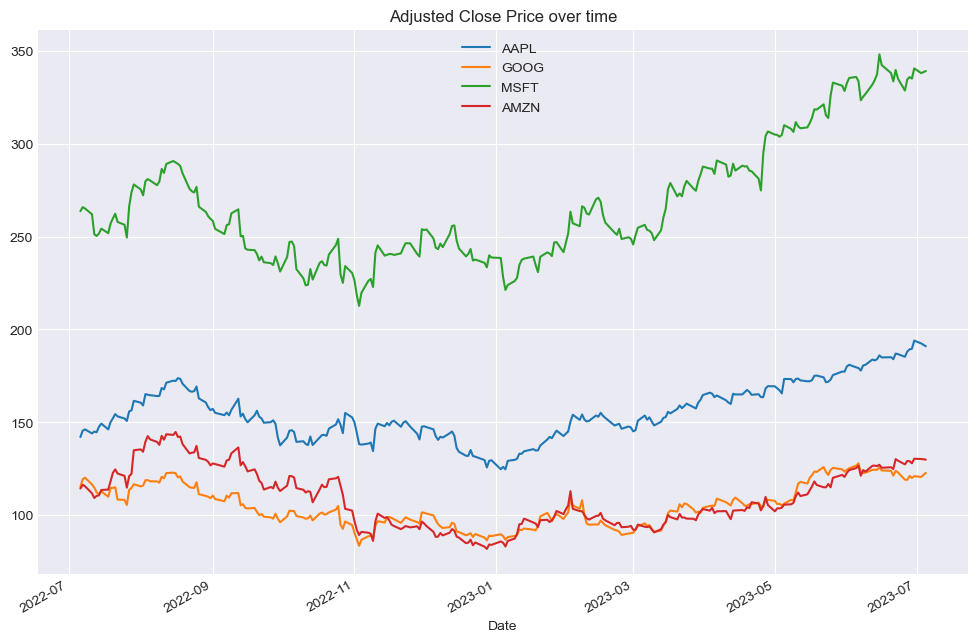

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

for stock in tech_list:
    df[df['Ticker'] == stock]['Adj Close'].plot(label=stock, figsize=(12, 8))
plt.legend(loc=9)
plt.title('Adjusted Close Price over time')
plt.show()

Despite the different price levels, this plot shows similar patterns in the movement of the Adjusted Close Price over time for the stocks. This similarity aids in understanding the overall trend, identifying periods of high and low volatility, and observing how these stocks may move in relation to each other.

### Risk and Returns analysis

Using daily returns instead of absolute stock prices allows for a standardized comparison of performance across different stocks, irrespective of their individual price levels.

In [5]:
df['Daily_Return'] = df.groupby('Ticker')['Adj Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,Ticker,Daily_Return
Date,,,,,,,,
2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071671,74064300,AAPL,NaN
2022-07-07,143.289993,146.550003,143.279999,146.350006,145.481308,66253700,AAPL,0.023999
2022-07-08,145.259995,147.550003,145.000000,147.039993,146.167191,64547800,AAPL,0.004715
2022-07-11,145.669998,146.639999,143.779999,144.869995,144.010071,63141600,AAPL,-0.014758
2022-07-12,145.759995,148.449997,145.050003,145.860001,144.994186,77588800,AAPL,0.006834
...,...,...,...,...,...,...,...,...
2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500,AMZN,-0.001084
2023-06-29,128.770004,129.259995,127.260002,127.900002,127.900002,40761000,AMZN,-0.008834
2023-06-30,129.470001,131.250000,128.949997,130.360001,130.360001,54310500,AMZN,0.019234


#### Correlation of Return and Adjusted Closing Price

Correlation is a statistic that measures how two variables move in relation to each other. However, it doesn't imply causation. It only suggests a relationship between the price movements of these stocks, which could be influenced by a third factor.

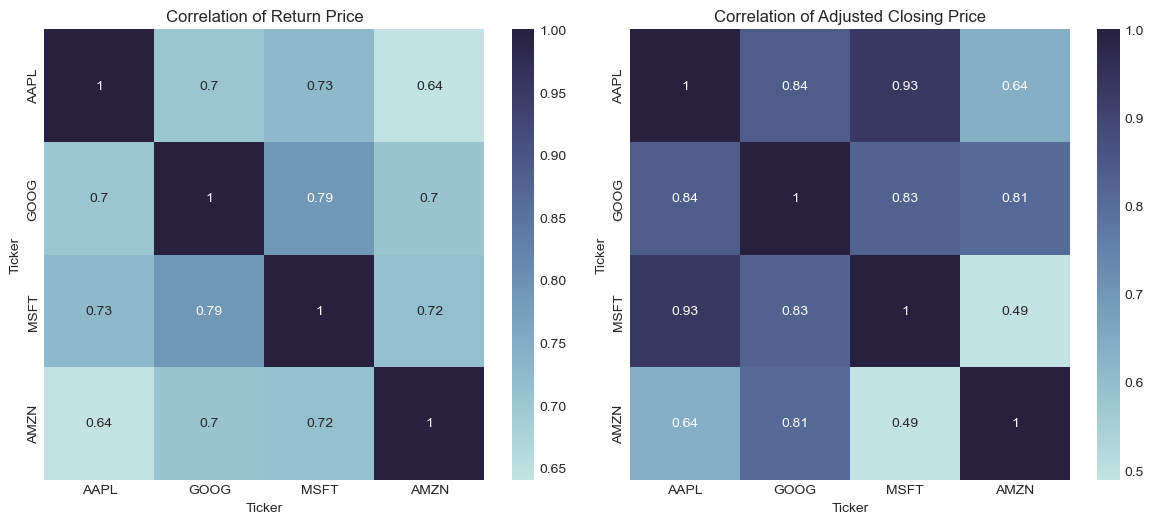

In [6]:
plt.figure(figsize=(12, 10))

# Create a DataFrame for daily returns and for adjusted close prices
daily_returns_df = df.pivot(columns='Ticker', values='Daily_Return')
closing_price_df = df.pivot(columns='Ticker', values='Adj Close')

# reordering the columns to match tech_list
daily_returns_df = daily_returns_df[tech_list]
closing_price_df = closing_price_df[tech_list]

plt.subplot(2, 2, 1)
sns.heatmap(daily_returns_df.corr(), annot=True, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Correlation of Return Price')

plt.subplot(2, 2, 2)
sns.heatmap(closing_price_df.corr(), annot=True, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Correlation of Adjusted Closing Price')

plt.tight_layout()  
plt.show()

This plot shows the strong correlation between daily returns and closing prices of these stocks, which is important for diversification. Diversifying across correlated stocks may not reduce risk as much as diversifying across uncorrelated stocks. 

#### The Distributions of Daily Returns

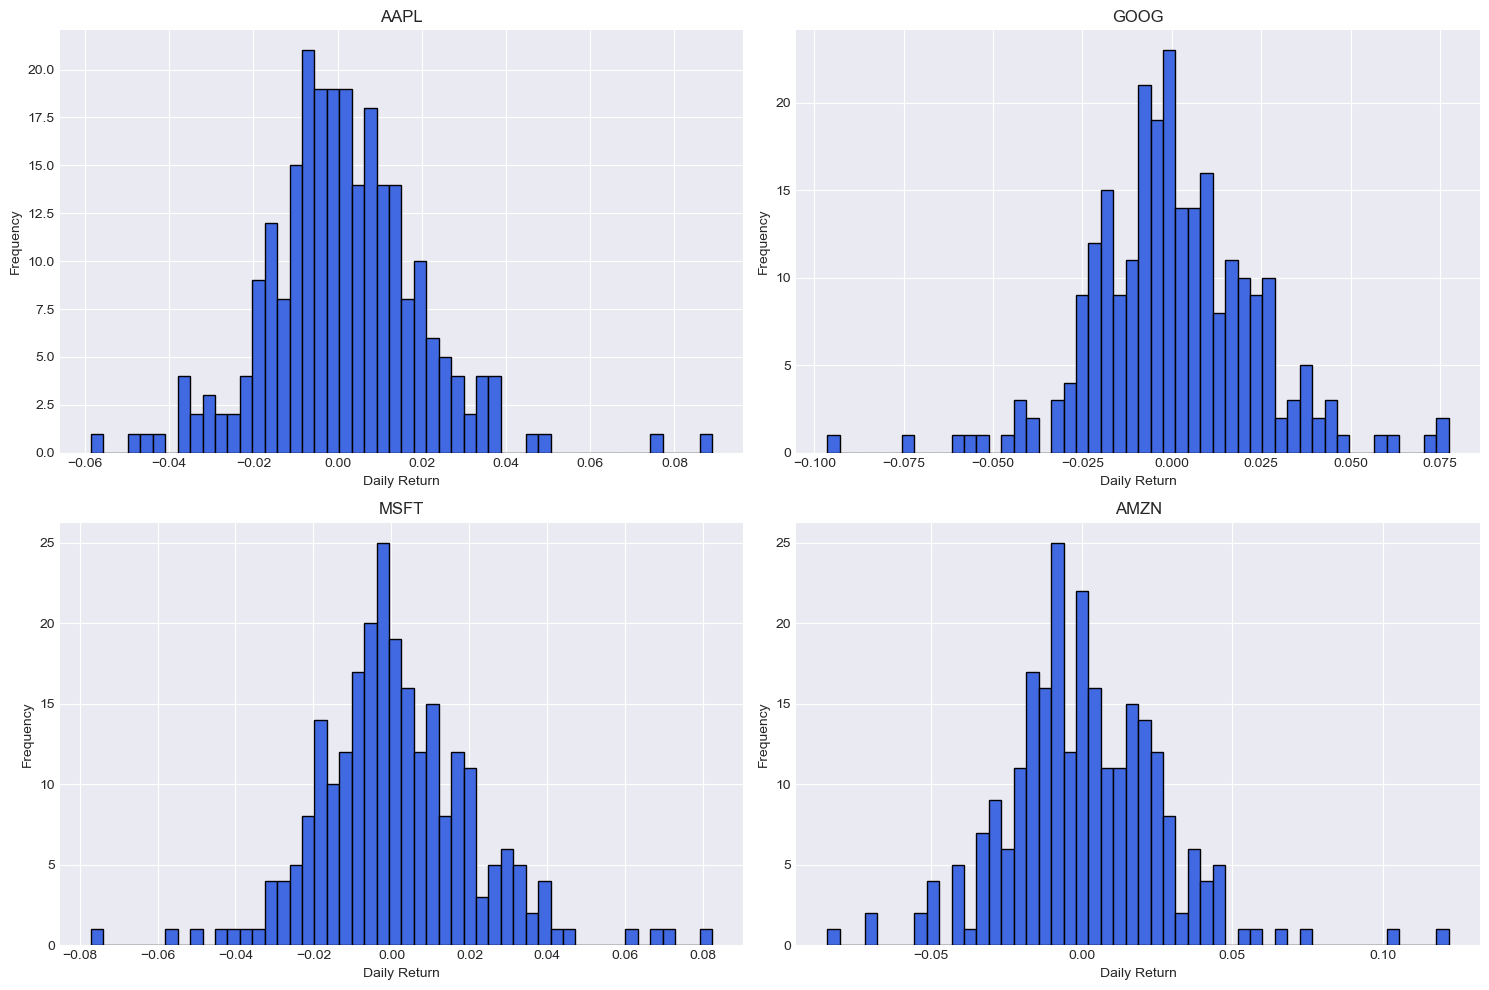

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

ax = [axes[0,0],axes[0,1],axes[1,0],axes[1,1]]

for i,stock in enumerate(tech_list):
    df[df['Ticker'] == stock]['Daily_Return'].plot(kind='hist', color = "royalblue", bins=50,  ax=ax[i], title=stock, edgecolor='black')
    ax[i].set_xlabel("Daily Return")

plt.tight_layout()
plt.show()

The histograms show that the daily returns for all four tech stocks are centered around 0. AAPL, MSFT, and AMZN exhibit a slight lean towards positive returns, GOOG's returns are almost equally likely to be positive or negative. This visual representation provides an initial insight into the typical behavior of these stocks. However, a more detailed analysis using statistical measures like standard deviation, skewness and kurtosis, will give a more complete picture of the risk-return profiles of these stocks.

#### Risk-Return Tradeoff Among Selected Tech Stocks

In this scatter plot, risk is represented by the standard deviation of daily returns, indicating the degree of volatility and thus the unpredictability of a stock's price. The expected return is shown as the mean of daily returns, providing a measure of the average gain or loss expected from a stock.

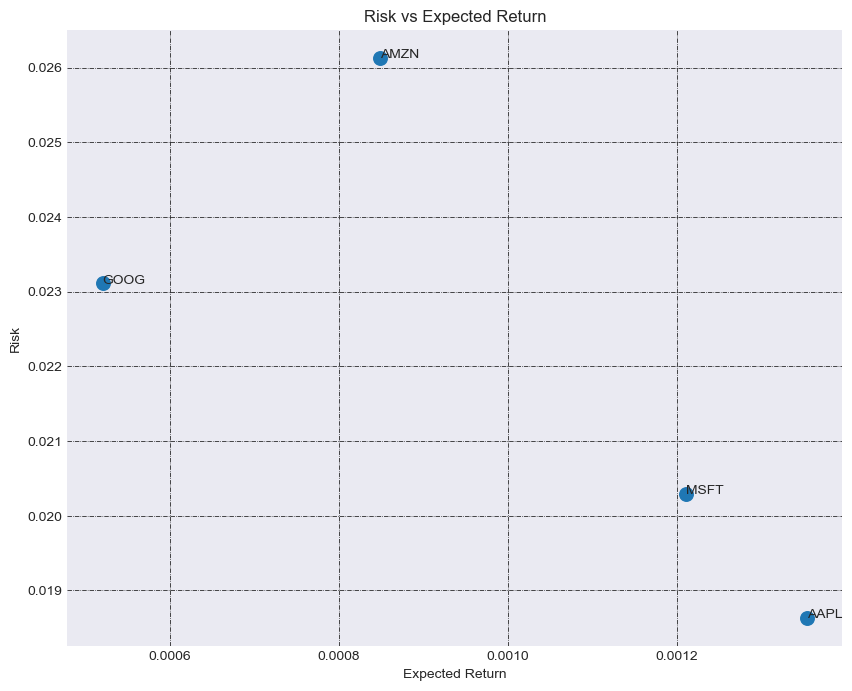

In [8]:
rets = daily_returns_df.dropna()

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=95) 


plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


plt.title('Risk vs Expected Return')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y))

plt.show()

This scatter plot displays the expected return and risk for the four selected stocks. GOOG and AMZN, despite having lower expected returns, also show the highest risks. MSFT presents a balanced profile with a favorable return and lower risk. AAPL stands out with the high expected return and the lowest risk. This serves as a foundation for selecting the most suitable stock for further predictive modeling.

#### Analyzing Skewness and Kurtosis of Stock Returns

Skewness is a measure of the asymmetry of the distribution. A positive skewness value indicates that the tail on the right side is longer or fatter than on the left side, this suggests that the probability of achieving unusually high positive returns is greater than unusually large losses.

Kurtosis is a measure of the shape of the distribution, higher kurtosis has heavier tails. The data points are heavily concentrated around the mean, and when they do deviate from the mean, they tend to deviate by a more extreme outliers, means there's a higher chance of extreme price movements.

,Standard Deviation,Skewness,Kurtosis
AAPL,0.018629,0.461116,2.645217
GOOG,0.023111,0.020028,2.020489
MSFT,0.020296,0.376096,2.109435
AMZN,0.026126,0.465032,2.440971


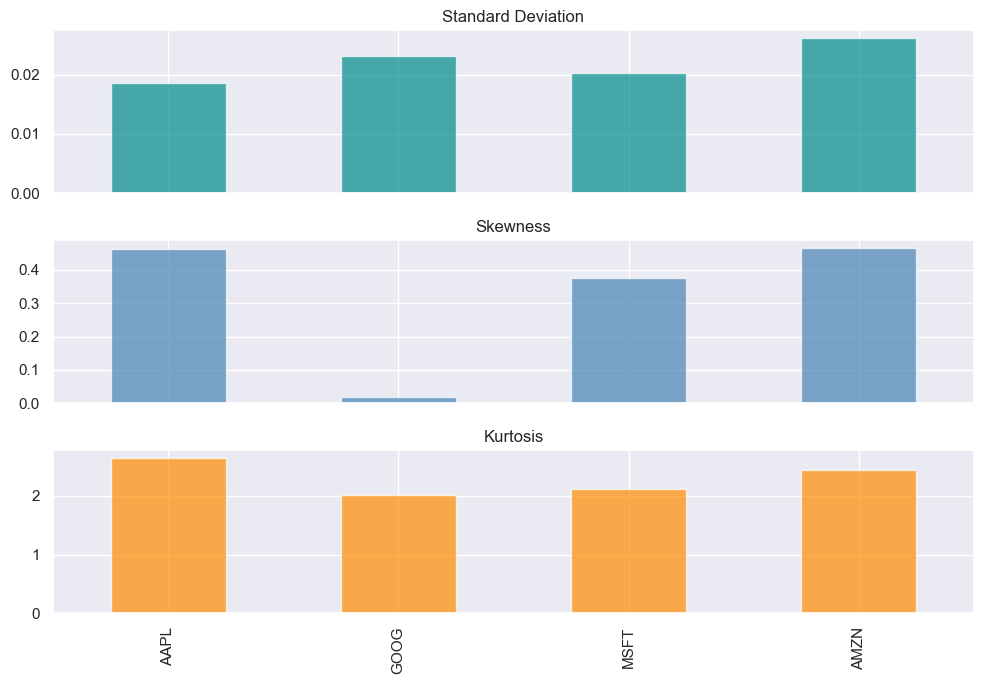

In [9]:
from scipy import stats

results = {}

for stock in tech_list:
    daily_returns = df[df['Ticker'] == stock]['Daily_Return'].dropna()
    
    std = daily_returns.std() 
    skewness = stats.skew(daily_returns)
    kurtosis = stats.kurtosis(daily_returns)
    
    # Store the results in the dictionary
    results[stock] = {"Standard Deviation": std, "Skewness": skewness, "Kurtosis": kurtosis}

# Convert the dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results).transpose()
display(results_df)

sns.set(style="darkgrid")

results_df.plot(kind='bar', subplots=True, layout=(3,1), legend=False, figsize=(10,7), 
                color=['darkcyan', 'steelblue', 'darkorange'], alpha=0.7)

plt.tight_layout()
plt.show()

AMZN may be the riskiest investment due to its highest standard deviation. Its positive skewness and high kurtosis further amplify this risk, indicating a likelihood of larger, positive, and extreme returns.

GOOG, with the second highest standard deviation, suggests slightly lower volatility than Amazon. Its lowest skewness implies more normalized returns, and lower kurtosis suggests fewer extreme returns.

MSFT, with moderate standard deviation and positive skewness, indicates a somewhat higher probability of positive returns. Its kurtosis suggests a moderate likelihood of extreme returns.

AAPL, with the lowest standard deviation, carries the least risk due to its low volatility. However, its relatively high positive skewness and high kurtosis suggest potential for higher and more extreme positive returns.

##### Considering these statistical metrics and the balance between risk and return, AAPL may be the most attractive investment. Despite having the lowest volatility, as indicated by the standard deviation, it exhibits relatively high positive skewness and high kurtosis. This suggests a tendency for higher and more extreme positive returns. In other words, Apple carries lower risk but still offers the potential for significant gains.

## Stage 3: Model Training

### Long Short-Term Memory (LSTM)

LSTM model is an advanced type of Recurrent Neural Network that is especially well-suited for dealing with time-series data like stock prices. LSTM networks have an edge over conventional techniques in that they can capture patterns over different time periods due to their design. They have internal mechanisms called gates that control the flow of information, allowing them to retain long-term dependencies and discard irrelevant historical information. This makes LSTM a powerful model for predicting future stock prices based on past trends. However, it's important to note that the inherent unpredictability aof financial markets cannot be completely mitigated by any model.

Based on the aforementioned risk and returns analysis, AAPL would be chosen for prediction. Using a decade's worth of data enables training the LSTM model across various market conditions, ensuring robust and accurate predictions of future prices. Stock prices like 'Open', 'High', 'Low', 'Close', and 'Adj Close' are highly correlated, and using any of them can yield similar results in predictive models. However, the 'Close' price directly reflects daily trading information and sentiment, appropriate for stock price predictions.

[*********************100%***********************]  1 of 1 completed

First and last few records:


,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2023-06-28,189.250000
2023-06-29,189.589996
2023-06-30,193.970001



Size of the data:


(2894, 1)


Data types:


Close    float64
dtype: object


Number of missing values:


Close    0
dtype: int64


The Polt of Closing Price History:


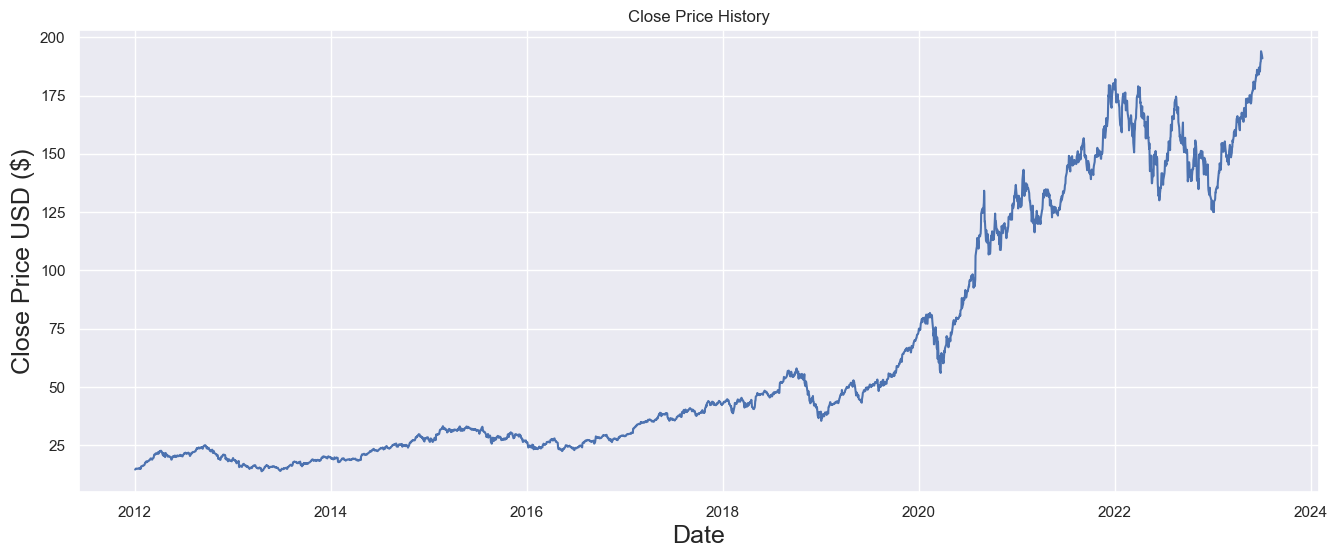

In [10]:
data = yf.download('AAPL', start='2012-01-01', end=datetime.now()).filter(['Close'])

print("\nFirst and last few records:")
display(data)

print("\nSize of the data:")
display(data.shape)

print("\nData types:")
display(data.dtypes)

print("\nNumber of missing values:")
display(data.isnull().sum())


print("\nThe Polt of Closing Price History:")
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Dataset Splitting

In [11]:
from sklearn.preprocessing import MinMaxScaler

# To convert the data to a numpy array for MinMaxScaler function. 
dataset = data.values 

# To normalize the data between zero and one. The transformation preserves the shape of the original distribution,
# making the training process faster and more stable. 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

display(scaled_data)
display(scaled_data.shape)

array([[0.00410663],
       [0.00454506],
       [0.00545566],
       ...,
       [1.        ],
       [0.99161219],
       [0.98305766]])

(2894, 1)

Training the model with 95% of the data enables it to learn from a wide range of market situations and patterns, leading to effective learning and fair evaluation of its predictive capabilities. This approach is particularly valuable for rapidly changing sectors where recent trends hold significance.

In [12]:
# Using 95% of data for training
train_data_len = int(np.ceil(len(scaled_data) * 0.95))

# Split the data into x_train and y_train data sets
train_data = scaled_data[0:train_data_len, :]
X_train = []
y_train = []

The past 60 trading days, around one quarter of financial data, hold relevance in predicting the stock price for the next day. A quarter is a common timeframe in business, encompassing significant events like the release of quarterly reports. Thus, the model needs to capture patterns over this period to make accurate predictions.

In [13]:
# Create the training data set
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])  # Past 60 days (Around one quarter of financial data)
    y_train.append(train_data[i, 0])  # Present day
    
# Convert the x_train and y_train to numpy arrays for compatibility with the Keras library.
X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM expects the input to be 3-Dimensional in the form (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
display(X_train.shape)
display(y_train.shape)

(2690, 60, 1)

(2690,)

### Define the LSTM model

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# To create a sequential neural network model and add LSTM layers to it.
model = Sequential()

model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))

model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

model.add(Dense(25))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
269/269 [==============================] - 11s 30ms/step - loss: 0.0022
Epoch 2/20
269/269 [==============================] - 8s 30ms/step - loss: 4.2260e-04
Epoch 3/20
269/269 [==============================] - 8s 30ms/step - loss: 2.9459e-04
Epoch 4/20
269/269 [==============================] - 8s 30ms/step - loss: 2.8148e-04
Epoch 5/20
269/269 [==============================] - 8s 30ms/step - loss: 3.4631e-04
Epoch 6/20
269/269 [==============================] - 8s 30ms/step - loss: 2.3267e-04
Epoch 7/20
269/269 [==============================] - 8s 30ms/step - loss: 2.1466e-04
Epoch 8/20
269/269 [==============================] - 8s 30ms/step - loss: 1.6258e-04
Epoch 9/20
269/269 [==============================] - 8s 30ms/step - loss: 2.3113e-04
Epoch 10/20
269/269 [==============================] - 8s 31ms/step - loss: 2.0704e-04
Epoch 11/20
269/269 [==============================] - 8s 30ms/step - loss: 1.4195e-04
Epoch 12/20
269/269 [==============================] - 

The assumption of the number of units is based on a balance between the model's ability to represent complex patterns and the potential risk of overfitting to the data.

The first LSTM layer comprises 100 units processes 60 time steps within each sequences. Each output at every time step is produced by the corresponding input being processed through the 100 units. This layer returns the full sequence of outputs, not just the output at the last time step.

The second LSTM layer comprises 50 units processes 60 time steps within each sequences provided by the previous layer. Each output is generated by the corresponding sequence of inputs being processed through the 50 units. This layer only returns the output of the final time step in each sequence, not the full sequence of outputs.

The first Dense layer takes the outputs from the second LSTM layer and maps them to a 25-dimensional space. This results in each sequence consisting of 25 learned features from the input sequences.

The final Dense layer takes the outputs from the previous layer and maps them to a single dimension. This results in each sequences with a single value, which is the final prediction of the model.

The Adam optimizer's strengths in managing data variability and adapting to shifting goals, coupled with the MSE loss function's ability to strongly penalize larger errors, make them a robust combination for stock price prediction.

Finally, the model will use 10 examples at a time to update the model parameters and the whole dataset will pass through the model 20 times. The choice is a balance between computational efficiency and model performance.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 72,301
Trainable params: 72,301
Non-trainable params: 0
_________________________________________________________________


## Stage 4: Model Evaluation 

In [16]:
# Create the testing data set 
test_data = scaled_data[train_data_len - 60: , :]
X_test = []
y_test = dataset[train_data_len:, :] 

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

# Convert X_test to a numpy array 
X_test = np.array(X_test)

# Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Getting the models predicted price values
predictions = model.predict(X_test) 
predictions = scaler.inverse_transform(predictions) #Undo scaling

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming 'predictions' and 'y_test' are the predicted and actual values

rmse = sqrt(mean_squared_error(y_test, predictions))
display('Root Mean Squared Error:', rmse)

#Calculate R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
display('R2 Score:', r2)


5/5 [==============================] - 1s 17ms/step


'Root Mean Squared Error:'

3.605122839321653

'R2 Score:'

0.9581884984534448

Root Mean Squared Error (RMSE) is the square root of the mean of the square of all the errors. The use of squaring the errors and then taking the square root gives more weight to larger errors.

Formula: RMSE = sqrt[(1/n) Σ(Pi - Oi)^2]
where:
Pi is the prediction for the ith data point
Oi is the observed (actual) value for the ith data point
n is the number of data points

R2 Score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable. The best possible score is 1.0. 

Formula: R2 = 1 - (SSR/SST)
where:
SSR is the sum of squares of the difference between the predicted value and the mean of the observed values.
SST is the sum of squares of the difference between the observed value and the mean of the observed values.

C:\Users\hin14\AppData\Local\Temp\ipykernel_25724\1048588745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


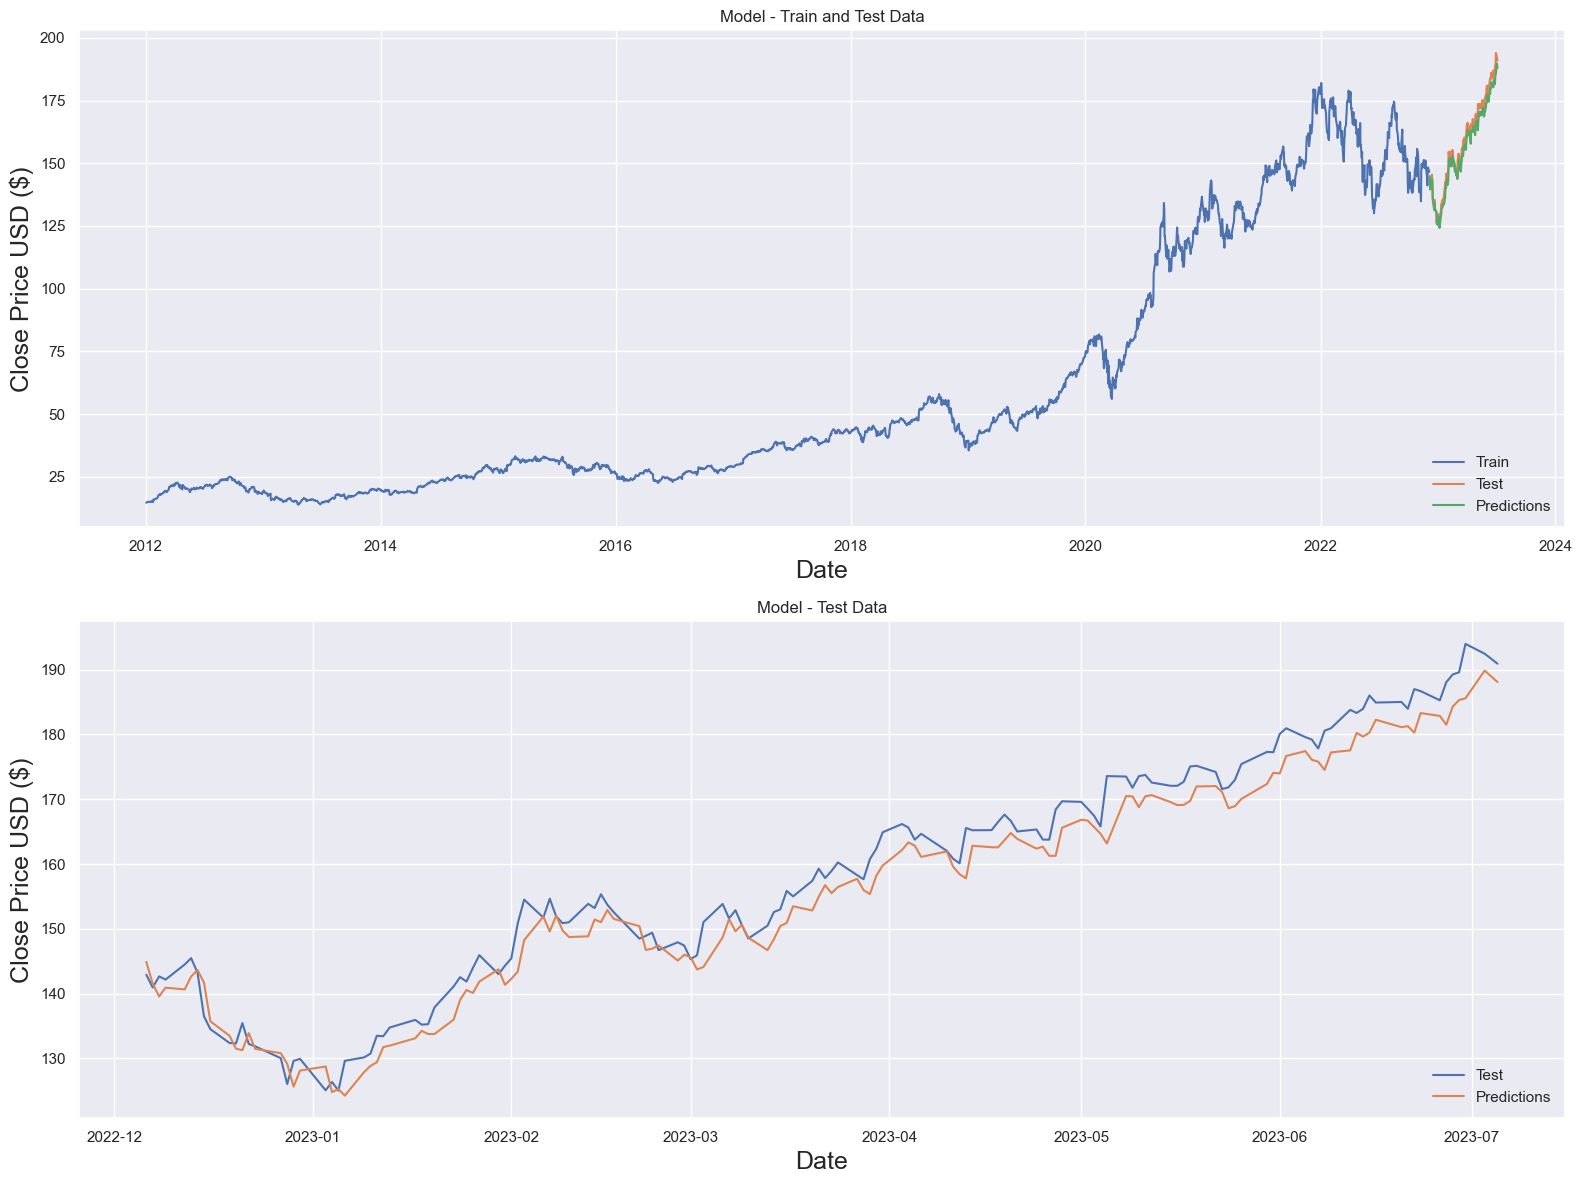

,Close,Predictions
Date,,
2022-12-06,142.910004,144.879272
2022-12-07,140.940002,141.514877
2022-12-08,142.649994,139.552032
2022-12-09,142.160004,140.911957
2022-12-12,144.490005,140.638885
...,...,...
2023-06-28,189.250000,184.286591
2023-06-29,189.589996,185.314774
2023-06-30,193.970001,185.581863


In [17]:
# Plotting the data
train = data[:train_data_len]
test = data[train_data_len:]
test['Predictions'] = predictions

plt.figure(figsize=(16,12))
plt.subplot(2, 1, 1)
plt.title('Model - Train and Test Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')

plt.subplot(2, 1, 2)
plt.title('Model - Test Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Test', 'Predictions'], loc='lower right')

plt.tight_layout()
plt.show()

# Show the test and predicted prices
test

## Stage 5: Model Inference 

## Prediction Over Different Time Periods

In [18]:
periods = [1, 7, 14, 30, 60]
results = []

for period in periods:
    test_period = test.iloc[:period]
    rmse = sqrt(mean_squared_error(test_period['Close'], test_period['Predictions']))
    r2 = r2_score(test_period['Close'], test_period['Predictions'])
    results.append((period, rmse, r2))

# Print out the results for each period
for period, rmse, r2 in results:
    print(f"Period: {period} days")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("-------")

Period: 1 days
RMSE: 1.969268798828125
R2 Score: nan
-------
Period: 7 days
RMSE: 2.3427643820345074
R2 Score: -1.8786446711292362
-------
Period: 14 days
RMSE: 2.528351489338959
R2 Score: 0.7450518976435312
-------
Period: 30 days
RMSE: 2.653934990501726
R2 Score: 0.7890631314749007
-------
Period: 60 days
RMSE: 3.0882852217045302
R2 Score: 0.8757516381016957
-------


C:\Users\hin14\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


The LSTM model's ability to predict stock prices over extended periods was evaluated and it was observed that as the forecast period lengthened, the accuracy of the prediction decreased, as reflected by a rising RMSE, while the R2 score increased, showing that the model was good at capturing overall trends.

This reveals an important insight: even though the LSTM model can grasp broad market trends, it struggles to provide precise predictions over longer periods. Thus, for applications requiring longer-term stock price prediction, the increasing prediction errors (RMSE) may outweigh the model's ability to fit the data's variance (R2).

This implies that the current LSTM model may not be the most suitable tool for accurate long-term stock price forecasts. Further advancements and adaptations of the model, such as inclusion of more financial indicators or use of advanced models, could potentially enhance its predictive accuracy. However, one must always consider the inherent uncertainty of the stock market data.

## Quantifying Prediction Uncertainty

In this project, we use a machine learning model to predict outcomes based on a set of test data. But instead of making a single prediction, we run the model 100 times to get a range of predictions.

These multiple predictions are used to understand how confident we can be in the model's predictions: if most predictions are close together, we can be more confident; if they're spread out, we're less confident.

We calculate the average prediction and measure the spread of predictions (the uncertainty). The results are then shown for each data point in the test set. This method helps us understand not just what the model predicts, but how sure it is about that prediction.

In [19]:
N_SIMULATIONS = 100
predictions = []

for _ in range(N_SIMULATIONS):
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred) 
    predictions.append(y_pred)

predictions = np.array(predictions)

# Measure uncertainty as the standard deviation of the predictions
uncertainty = np.std(predictions, axis=0)

# Get the average prediction over all simulations
average_prediction = np.mean(predictions, axis=0)

# For each test data point, print the average prediction and uncertainty
for i in range(len(X_test)):
    print(f"Test point {i+1}:")
    print(f"Average prediction: {average_prediction[i]}")
    print(f"Uncertainty: {uncertainty[i]}")
    print("------------------")

5/5 [==============================] - 0s 18ms/step
Test point 1:
Average prediction: [144.87917]
Uncertainty: [0.00010681]
------------------
Test point 2:
Average prediction: [141.51471]
Uncertainty: [0.00016785]
------------------
Test point 3:
Average prediction: [139.55197]
Uncertainty: [6.1035156e-05]
------------------
Test point 4:
Average prediction: [140.91205]
Uncertainty: [9.1552734e-05]
------------------
Test point 5:
Average prediction: [140.63873]
Uncertainty: [0.00015259]
------------------
Test point 6:
Average prediction: [142.63483]
Uncertainty: [0.00010681]
------------------
Test point 7:
Average prediction: [143.64328]
Uncertainty: [0.00015259]
------------------
Test point 8:
Average prediction: [141.7149]
Uncertainty: [0.00016785]
------------------
Test point 9:
Average prediction: [135.72455]
Uncertainty: [0.00012207]
------------------
Test point 10:
Average prediction: [133.48528]
Uncertainty: [0.00015259]
------------------
Test point 11:
Average predictio

Most of the uncertainty values are very low, suggesting that the model is highly confident in its predictions. This indicates that there is very little variability or noise in predictions.

However, a low uncertainty does not necessarily mean the prediction is accurate. It simply means the model is confident given the data it was trained on and the specific input it was provided.

### On-demand Prediction of Next Day's Stock Price:

In [20]:
def predict_next_day_price(model, scaler):
    # Download the latest 60 days of AAPL data
    df = yf.download('AAPL', period='3mo', interval='1d')
    closing_prices = df['Close'].values[-60:].reshape(-1, 1)

    scaled_data = scaler.transform(closing_prices)

    x_test = np.reshape(scaled_data, (1, scaled_data.shape[0], 1))

    predicted_scaled_price = model.predict(x_test)

    predicted_price = scaler.inverse_transform(predicted_scaled_price)

    print("Predicted next day's closing price:", predicted_price[0][0])

# Call the function:
predict_next_day_price(model, scaler)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 37ms/step
Predicted next day's closing price: 186.81549


We've implemented an on-demand prediction model using a LSTM neural network, which leverages the most recent 60 days of stock data for its predictions. This up-to-date information provides us with a better chance of accuracy in such a fast-paced, fluctuating market as the stock exchange.

Walk-forward prediction might seem logical in theory but often underperforms in real-world scenarios, especially in dynamic and complex environments like stock price prediction. Since each prediction is used as input for the next, errors from the initial prediction can propagate and magnify, causing a rapid degradation in the accuracy of future predictions.

The project is set up in Google Colab, it does not support long-term running jobs or scheduled tasks. Because of this, our prediction function is intended to be run manually, offering flexibility when it comes to performing on-demand predictions. This approach can be showcased during a project presentation by running the script live.

Our approach provides a practical, on-demand method for predicting the next day's closing stock price while acknowledging the inherent complexity and uncertainties of the stock market. Although automation within Colab is limited, this project lays the foundation for a future transition to a more production-ready setting that supports automation.

# Summary

This project primarily addresses three key problems related to stock price prediction:

Risk and Return Analysis: After an in-depth statistical examination of AAPL, GOOG, MSFT, and AMZN using standard deviation, skewness, and kurtosis, we identified AAPL as the stock with the most favorable risk-return profile.

Stock Price Prediction: Leveraging the LSTM model's proficiency in handling sequential data, we built, optimized, and evaluated a machine learning model using AAPL's historical price data to predict future prices. Despite an increase in the RMSE as the prediction period lengthened, the model exhibited a capacity to capture overall market trends as reflected by an increased R2 score. However, it also indicated the model's limitations in providing precise predictions over extended periods, suggesting that further model enhancements could improve its long-term predictive accuracy.

Forecast Uncertainty Estimation: To provide a real-world application, we configured the LSTM model to perform real-time, on-demand predictions, using the most recent 60 days of stock data to predict the next day's closing price. The model's uncertainty values were generally low, reflecting a high level of confidence in its predictions despite the acknowledgement that a low uncertainty does not equate to high accuracy.

Furthermore, we don't use the walk-forward prediction method, which, despite its logical approach, often underperforms in complex and dynamic environments like stock markets due to error propagation. Thus, our prediction function, built in Google Colab, is designed for manual execution, providing flexibility for on-demand predictions.

In conclusion, this project delivers a pragmatic method for predicting future closing stock prices while recognizing the inherent complexities and uncertainties of the stock market. Despite some limitations with Google Colab concerning long-term running jobs and scheduled tasks, this project paves the way for a future transition to a more production-oriented environment that supports automation.